In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import os
path = os.getcwd()

if path[1:5] == "Home":
    %run /Home/siv30/wad005/master/GRB/src/T0.ipynb
else:
    %run /Users/andreas/phys/master/GRB/src/T0.ipynb
    %run /Users/andreas/fun/useful_py_func/matplotlib_custom_style_and_macros.py

In [2]:
#Need to get a arrays of the the orientations

In [3]:
T0s = df_time['T0'].to_numpy()

bad_T0s = ['2018-12-22T20:11:36.576228', '2019-02-06T03:49:28.525262', '2019-03-05T13:05:19.816318', '2020-05-21T12:16:39.818925']
good_T0s = ['2019-06-06T01:55:07.318605', '2020-07-16T22:57:40.634534', '2020-12-27T15:14:06.853667', '2021-06-19T23:59:24.915550', '2021-12-11T13:10:01.323743']

In [4]:
bad_GRB,good_GRB = [],[]
GRBs = {}
for T in T0s:
    dt = datetime.fromisoformat(T)
    if T in good_T0s:
        GRBs['GRB'+datetime.strftime(dt,'%y%m%d')] = {'constant':True, 'theta': None, 'phi': None}
    elif T in bad_T0s:
        GRBs['GRB'+datetime.strftime(dt,'%y%m%d')] = {'constant':False, 'theta': None, 'phi': None}
    else:
        GRBs['GRB'+datetime.strftime(dt,'%y%m%d')] = {'constant':0, 'theta': None, 'phi': None}
GRBs

{'GRB180720': {'constant': 0, 'theta': None, 'phi': None},
 'GRB181222': {'constant': False, 'theta': None, 'phi': None},
 'GRB190206': {'constant': False, 'theta': None, 'phi': None},
 'GRB190305': {'constant': False, 'theta': None, 'phi': None},
 'GRB190606': {'constant': True, 'theta': None, 'phi': None},
 'GRB200415': {'constant': 0, 'theta': None, 'phi': None},
 'GRB200521': {'constant': False, 'theta': None, 'phi': None},
 'GRB200716': {'constant': True, 'theta': None, 'phi': None},
 'GRB201227': {'constant': True, 'theta': None, 'phi': None},
 'GRB210424': {'constant': 0, 'theta': None, 'phi': None},
 'GRB210619': {'constant': True, 'theta': None, 'phi': None},
 'GRB211211': {'constant': True, 'theta': None, 'phi': None}}

In [5]:
#parsing the theta, phi angles into the GRBs

GRBs['GRB180720']['theta'] = 141.258
GRBs['GRB180720']['phi'] = -42.464

GRBs['GRB181222']['theta'] = 100.620
GRBs['GRB181222']['phi'] = -49.010

GRBs['GRB190206']['theta'] = 110.887
GRBs['GRB190206']['phi'] = -36.980

GRBs['GRB190305']['theta'] = 133.904 
GRBs['GRB190305']['phi'] = -2.076

GRBs['GRB190606']['theta'] = 120.145
GRBs['GRB190606']['phi'] = -21.006

GRBs['GRB200415']['theta'] = 70.643
GRBs['GRB200415']['phi'] = -81.754 

GRBs['GRB200521']['theta'] = 130.707
GRBs['GRB200521']['phi'] = -45.646

GRBs['GRB200716']['theta'] = 143.836
GRBs['GRB200716']['phi'] = -140.012

GRBs['GRB201227']['theta'] = 77.318
GRBs['GRB201227']['phi'] = -50.463

GRBs['GRB210424']['theta'] = 96.097 
GRBs['GRB210424']['phi'] = -17.705 

GRBs['GRB210619']['theta'] = 135.591
GRBs['GRB210619']['phi'] = -138.783 

GRBs['GRB211211']['theta'] = 112.775 
GRBs['GRB211211']['phi'] = -177.757
GRBs

{'GRB180720': {'constant': 0, 'theta': 141.258, 'phi': -42.464},
 'GRB181222': {'constant': False, 'theta': 100.62, 'phi': -49.01},
 'GRB190206': {'constant': False, 'theta': 110.887, 'phi': -36.98},
 'GRB190305': {'constant': False, 'theta': 133.904, 'phi': -2.076},
 'GRB190606': {'constant': True, 'theta': 120.145, 'phi': -21.006},
 'GRB200415': {'constant': 0, 'theta': 70.643, 'phi': -81.754},
 'GRB200521': {'constant': False, 'theta': 130.707, 'phi': -45.646},
 'GRB200716': {'constant': True, 'theta': 143.836, 'phi': -140.012},
 'GRB201227': {'constant': True, 'theta': 77.318, 'phi': -50.463},
 'GRB210424': {'constant': 0, 'theta': 96.097, 'phi': -17.705},
 'GRB210619': {'constant': True, 'theta': 135.591, 'phi': -138.783},
 'GRB211211': {'constant': True, 'theta': 112.775, 'phi': -177.757}}

# polar plot

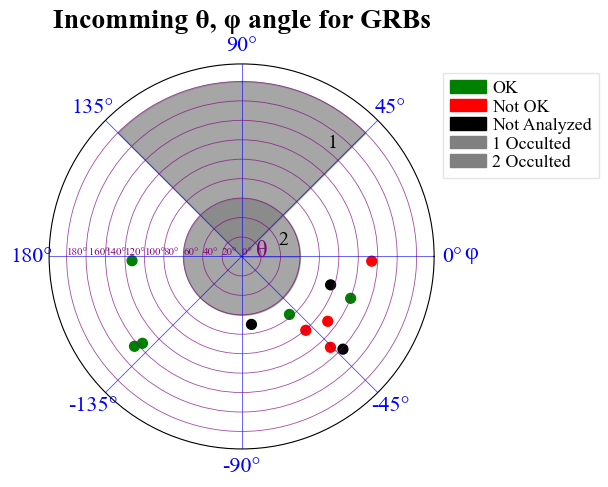

In [44]:
from matplotlib.patches import Patch
%matplotlib inline

thetas = [GRBs[key]['theta'] for key in GRBs.keys()]
phis = [GRBs[key]['phi'] for key in GRBs.keys()]
constant = [GRBs[key]['constant'] for key in GRBs.keys()]
colors = []
for c in constant:
    if isinstance(c,bool):
        if c == True:
            colors.append('green')
        else:
            colors.append('red')
    else:
        colors.append('black')
        
ax = plt.subplot(polar=True)
ax.scatter(np.deg2rad(phis), np.deg2rad(thetas), color=colors, marker='.',s=200)

ax.set_xticks(np.arange(0, 2*np.pi, np.pi/4), minor=True)
ax.set_xticks(np.deg2rad([0, 45, 90, 135, 180, 225, 270, 315]), minor=False,)
ax.set_xticklabels([u'0\u00b0', u'45\u00b0', u'90\u00b0', u'135\u00b0', u'180\u00b0', u'-135\u00b0', u'-90\u00b0', u'-45\u00b0'],c='b')
ax.set_rticks(np.deg2rad([0, 20, 40, 60, 80, 100, 120, 140, 160, 180]))
ax.set_yticklabels([u'0\u00b0 ',u'20\u00b0', u'40\u00b0',u'60\u00b0', u'80\u00b0',u'100\u00b0', u'120\u00b0',u'140\u00b0', u' 160\u00b0',u'180\u00b0'],fontsize=8,c='purple',label='theta')
ax.set_rlabel_position(180)
theta = np.linspace(0, 2*np.pi, 1000)
ax.xaxis.grid(True,color='blue',linestyle='-')
ax.yaxis.grid(True,color='purple',linestyle='-')

ax.fill_between(theta, y1=0, y2=np.deg2rad(60), color='grey', alpha=0.7)
ax.fill_between(np.deg2rad(np.linspace(45,135,1000)), y1=0, y2=np.deg2rad(180), color='grey', alpha=0.7)


ax.text(0.9,2.5,"1",fontsize='x-large')
ax.text(0.3,0.7,"2",fontsize='x-large')
ax.text(-0.01,4,chr(966),fontsize='xx-large',color='blue')
ax.text(0.01,0.25,chr(952),fontsize='xx-large',color='purple')

labels = ['OK', 'Not OK', 'Not Analyzed','1 Occulted','2 Occulted']
patches = [Patch(color='green', label=labels[0]), 
           Patch(color='red', label=labels[1]), 
           Patch(color='black', label=labels[2]),
           Patch(color='grey', label=labels[3]),
           Patch(color='grey', label=labels[4])]

plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1,1))
plt.title(f'Incomming {chr(952)}, {chr(966)} angle for GRBs',fontsize=20, fontweight='bold')

plt.savefig('polar_plot.pdf',dpi=300)
plt.show()
